Santiago Quiroz Upegui cc: 1036678350. Grupo 1

SIMULACIÓN DE SISTEMAS - 3007331

PRÁCTICA # 4 -

Problema 1. Banco Unal

El Banco Unal lo ha contactado a usted para analizar la cola de la única taquilla de la

sucursal ubicada en la Universidad Nacional de Colombia Sede Medellín que tienen, por

medio de la simulación de la llegada de 100 usuarios. Para ello, le otorga la siguiente

información:

• El tiempo entre llegadas de los usuarios es una variable aleatoria que se distribuye

exponencial con parámetro lambda (𝜆) igual a 1,5.

• El tiempo de servicio es una variable aleatoria que se distribuye normal con media

(𝜇) 2 minutos y desviación estándar (𝜎) de 1 minutos.

El análisis de esta cola debe contener según las condiciones del contrato con el Metro de

Medellín:

a. el tiempo promedio en el sistema de los clientes.

b. el tiempo promedio en la taquilla de los usuarios.

c. el tiempo promedio de espera de los usuarios.

d. un histograma del tiempo de espera de los usuarios. Analícelo. 





In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

"La variable aleatoria es el tiempo de llegada entre clientes"

hay que generar 100 tiempos entre llegada

cual de los metodos para generar variables aleatorias sera el mejor para este problema?

R/ transformacion inversa

"siempre que se vea una normal utilice el box mewller"

"el primer cliente llega a la hora 0"

"tiempo de servicio" 

"el primer cliente tiene un tiempo de espera 0"

"se tiene una hora de salida =  hora de llegada + tiempo de espera + tiempo de servicio"

Tiempo sistema = hora salida - hora de LLegada

                TiempoServicio + tiempo en fila



HoraLLegada = HoraLLegada[i-1]+ TiempoEntreLLegada[i-1]

TiempoEnFila = si (horaLLegada[i] - HoraSalidaDel sistema[i-1]) > 0 entonces el TiempoEnFila[i] = 0

                sino (si espera entonces TiempoEnFila[i]= abs(horaLLegada[i]-HoraSalida[i-1]))

transformada inversa

## Definimos las funciones para generar los tiempos:

In [2]:
def genTiempoEntreLlegada () :
    lambdaValue = 1.5
    r = random.uniform(0, 1)
    x1 = (-1/ lambdaValue) * math.log(1-r) 
    return x1


def genTiempoServicio () :

    media = 2
    desviacionEstandar = 1
    r = random.gauss(2,1)
    return r


### Simulamos 100 llegadas de clientes calculando todos los datos necesarios

In [3]:
#definimos los datos de la simulacion:
#datosSimulacion matriz que contiene en cada fila [Tiempo entre llegadas, Tiempo de servicio Tiempo de llegada, Tiempo en fila, Tiempo de finalizacion del servicio, Tiempo total en el sistema]
datosSimulacion = []

# como el primero en llegar a la cola no tiene que esperar no tiene que esperar en la fila y el tiempo de llegada es el mismo al tiempo entre llegadas generado aleatoriamente
TiempoEntreLLegadas = genTiempoEntreLlegada()
TiempoServicio = genTiempoServicio()
TiempoLLegada = TiempoEntreLLegadas
TiempoEnFila = 0
TiempoFinalizacionServicio = TiempoLLegada + TiempoServicio + TiempoEnFila
TiempoTotalSistema = TiempoFinalizacionServicio - TiempoLLegada

datosSimulacion.append([TiempoEntreLLegadas, TiempoServicio, TiempoLLegada, TiempoEnFila, TiempoFinalizacionServicio, TiempoTotalSistema])

# con los otros restantes si es diferente
n = 100
for i in range(1,n):
    TiempoLLegadaAnterior = datosSimulacion[i-1][2]
    TiempoFinalizacionServicioAnterior = datosSimulacion[i-1][4]
    TiempoEntreLLegadas = genTiempoEntreLlegada()
    TiempoServicio = genTiempoServicio()
    TiempoLLegada = TiempoEntreLLegadas + TiempoLLegadaAnterior
    TiempoEnFila = 0
    espera = TiempoLLegada - TiempoFinalizacionServicioAnterior
    if espera <= 0:
        TiempoEnFila = abs(espera)
    TiempoFinalizacionServicio = TiempoLLegada + TiempoServicio + TiempoEnFila
    TiempoTotalSistema = TiempoFinalizacionServicio - TiempoLLegada

    datosSimulacion.append([TiempoEntreLLegadas, TiempoServicio, TiempoLLegada, TiempoEnFila, TiempoFinalizacionServicio, TiempoTotalSistema])


### definimos funciones para estimar los estadisticos necesarios para analizar el problema

In [4]:
#funcion que calcula los estimadores necesarios para el intervalo de confianza de la media y retorna una tupla (media, desviacion)
def calcularEstimadores(datos):
    media = np.mean(datos,axis=0)
    desviacionEstandar = np.std(datos,axis=0)
    return (media, desviacionEstandar)

#funcion que retorna un intervalo de confianza para la media 
def calcularIntervaloConfianzaMedia(media, desviacion, alfa, n):
    #calculando el intervalo de confianza
    t_tabla= t.ppf(1-(alfa/2),(n-1))
    derecha =media+(t_tabla)*(desviacion/(n**1/2))
    izquierda = media-(t_tabla)*(desviacion/(n**1/2))
    return (izquierda, derecha)

## definimos una funcion para calcular un intervalo de confianza para una media poblacional

In [5]:
def calcularIntervaloConfianzaMedia(media, desviacionEstandar, numeroSimulaciones):
    #calculando el intervalo de confianza
    t_tabla= t.ppf(1-(alfa/2),(numeroSimulaciones-1))
    print("valor t con grados de libertad α/2 y n-1 ", t_tabla)
    derecha =media+(t_tabla)*(desviacionEstandar/(numeroSimulaciones**1/2))
    izquierda = media-(t_tabla)*(desviacionEstandar/(numeroSimulaciones**1/2))
    return (izquierda,derecha)


## calculamos los estimadores para los datos


In [6]:
medias , desviaciones = calcularEstimadores(datosSimulacion) 


In [7]:
alfa = 0.05

## a. el tiempo promedio en el sistema de los clientes. 

In [8]:
print("El tiempo promedio en el sistema de la muestra fue de: ", medias[5] )

# calculamos el intervalo de confianza para este
intervaloMediaTiempoTotalSistema = calcularIntervaloConfianzaMedia(medias[5], desviaciones[5], n)

print("Un intervalo con un 95 por ciento de confianza para la media poblacional del tiempo promedio que pasa un cliente en el sistema es: ")
print(intervaloMediaTiempoTotalSistema)

El tiempo promedio en el sistema de la muestra fue de:  70.05491289540815
valor t con grados de libertad α/2 y n-1  1.9842169515086827
Un intervalo con un 95 por ciento de confianza para la media poblacional del tiempo promedio que pasa un cliente en el sistema es: 
(68.4454499586721, 71.6643758321442)


## b. el tiempo promedio en la taquilla de los usuarios. 

In [9]:
print("El tiempo promedio en la taquilla de la muestra fue de: ", medias[1] )

# calculamos el intervalo de confianza para este
intervaloMediaTiempoServicio = calcularIntervaloConfianzaMedia(medias[1], desviaciones[1], n)

print("Un intervalo con un 95 por ciento de confianza para la media poblacional del tiempo promedio que pasa un cliente en el servicio de taquilla es: ")
print(intervaloMediaTiempoServicio)

El tiempo promedio en la taquilla de la muestra fue de:  1.9901590692182578
valor t con grados de libertad α/2 y n-1  1.9842169515086827
Un intervalo con un 95 por ciento de confianza para la media poblacional del tiempo promedio que pasa un cliente en el servicio de taquilla es: 
(1.9571734989070626, 2.0231446395294532)


## c. el tiempo promedio de espera de los usuarios. 

In [10]:
print("El tiempo promedio de espera de clientes de la muestra fue de: ", medias[3] )

# calculamos el intervalo de confianza para este
intervaloMediaTiempoEnFila = calcularIntervaloConfianzaMedia(medias[3], desviaciones[3], n)

print("Un intervalo con un 95 por ciento de confianza para la media poblacional del tiempo promedio que pasa un cliente en espera en la fila es: ")
print(intervaloMediaTiempoEnFila)

El tiempo promedio de espera de clientes de la muestra fue de:  68.06475382618987
valor t con grados de libertad α/2 y n-1  1.9842169515086827
Un intervalo con un 95 por ciento de confianza para la media poblacional del tiempo promedio que pasa un cliente en espera en la fila es: 
(66.45882213070557, 69.67068552167417)


## d. un histograma del tiempo de espera de los usuarios. Analícelo. 

calculando el numero k de intervalos(clases):
k=roundup(log2(n)+1)

este es el k de las clases  8


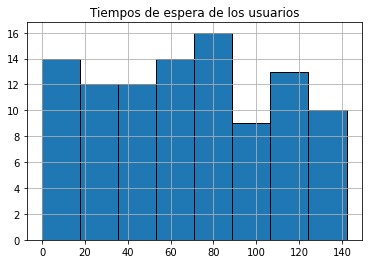

<Figure size 432x288 with 0 Axes>

In [11]:
k = math.ceil(math.log2(n) + 1)

tiemposEnFilaClientes = []

for i in range (0,len(datosSimulacion)) :
    tiemposEnFilaClientes.append(datosSimulacion[i][3])

print("este es el k de las clases ", k)
plt.title('Tiempos de espera de los usuarios')
plt.hist(tiemposEnFilaClientes, bins=k, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

podemos ver que la frecuencia maxima de la muestra esta cerca a 80 y la minima frecuencia de la muestra esta cerca a 100 y tambien observamos que la distribucion de estos datos podria aproximarse a una distribucion uniforme  